In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
result=pd.read_csv('drug.csv',encoding= 'unicode_escape')

In [4]:
result

,drug,dosage,condition,review,rating,usefulCount,bp,sugar,temperature,age,Sideeffects
0,Mirtazapine,15.0000,Depression,"""I&#039;ve tried a few antidepressants over th...",10,22,normal,normal,97,30,dizziness
1,Mesalamine,250.0000,Lymphocytic Colitis,"""I am newly diagnosed with LC, I am 38 years o...",8,23,abnormal,abnormal,97,22,headache
2,Bactrim,0.2400,Urinary Tract Infection,"""Quick reduction of symptoms""",9,3,abnormal,abnormal,103,56,vomting
3,Contrave,8.0000,Weight Loss,"""Contrave combines drugs that were used for al...",9,35,abnormal,abnormal,100,35,vomting and headache
4,LEVORA,0.1500,Birth Control,"""I was on this pill for almost two years. It d...",2,3,abnormal,abnormal,97,30,headache and dizziness
5,Miconazole,0.0003,Vaginal Yeast Infection,"""Honestly its day one on the 3 day treatment. ...",6,7,abnormal,abnormal,100,40,dizziness
6,Nuvigil,15.0000,Narcolepsy,"""A doctor in the ER prescribed me 200 mg of Pr...",9,14,abnormal,abnormal,97,45,headache
7,Ciprofloxacin,500.0000,Urinary Tract Infection,"""After just 1 dose of this ciprofloxacn, I fel...",10,9,abnormal,abnormal,97,55,vomting
8,Trazodone,50.0000,Insomnia,"""If I could give it a 0, I would absolutely do...",1,15,abnormal,abnormal,101,65,vomting and headache
9,Aripiprazole,5.0000,Bipolar Disorde,"""After a few days and it &quot;kicked in,&quot...",1,27,normal,normal,102,70,headache and dizziness


In [5]:
result.isnull().sum()

drug           0
dosage         0
condition      0
review         0
rating         0
usefulCount    0
bp             0
sugar          0
temperature    0
age            0
Sideeffects    0
dtype: int64

In [6]:
result.loc[result['bp']=='normal', 'bp'] =1
result.loc[result['bp']=='abnormal', 'bp'] = 2

result.loc[result['sugar']=='normal', 'sugar'] =1
result.loc[result['sugar']=='abnormal', 'sugar'] = 2




result.loc[result['condition']=='Depression', 'condition'] =1
result.loc[result['condition']=='Lymphocytic Colitis', 'condition'] =2
result.loc[result['condition']=='Urinary Tract Infection', 'condition'] =3
result.loc[result['condition']=='Weight Loss', 'condition'] =4
result.loc[result['condition']=='Birth Control', 'condition'] =5
result.loc[result['condition']=='Vaginal Yeast Infection', 'condition'] =6
result.loc[result['condition']=='Narcolepsy', 'condition'] =7
result.loc[result['condition']=='Insomnia', 'condition'] =8
result.loc[result['condition']=='Bipolar Disorde', 'condition'] =9
result.loc[result['condition']=='Hyperhidrosis', 'condition'] =10
result.loc[result['condition']=='Panic Disorde', 'condition'] =11
result.loc[result['condition']=='Rosacea', 'condition'] =12
result.loc[result['condition']=='Bowel Preparation', 'condition'] =13
result.loc[result['condition']=='Constipation, Drug Induced', 'condition'] =14
result.loc[result['condition']=='Diabetes, Type 2', 'condition'] =15
result.loc[result['condition']=='Pain', 'condition'] =16
result.loc[result['condition']=='Alcohol Dependence', 'condition'] =17
result.loc[result['condition']=='Emergency Contraception', 'condition'] =18
result.loc[result['condition']=='Major Depressive Disorde', 'condition'] =19
result.loc[result['condition']=='Anxiety', 'condition'] =20
result.loc[result['condition']=='Acne', 'condition'] =21
result.loc[result['condition']=='Cough and Nasal Congestion', 'condition'] =22






In [7]:
y1=result['Sideeffects']
x=result[['bp','sugar','temperature','age','condition']]
print(y1)
print(x)

0                  dizziness
1                   headache
2                    vomting
3       vomting and headache
4     headache and dizziness
5                  dizziness
6                   headache
7                    vomting
8       vomting and headache
9     headache and dizziness
10               weight gain
11                  heatburn
12                  headache
13                   vomting
14      vomting and headache
15    headache and dizziness
16                 dizziness
17                  headache
18                   vomting
19      vomting and headache
20    headache and dizziness
21               weight gain
22                 dizziness
23                  headache
24                 dizziness
25                  headache
26                 dizziness
27                  headache
28                 dizziness
29                  headache
30                 dizziness
31                  headache
32                 dizziness
33                  headache
34            

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y1,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x, y1)

In [10]:
from sklearn.metrics import accuracy_score
y_pred_class = clf.predict(X_test)

print("Training Accuracy: ",clf.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.9642857142857143
Test Accuracy:  1.0


In [11]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred_class))

                        precision    recall  f1-score   support

             dizziness       1.00      1.00      1.00         3
              headache       1.00      1.00      1.00         2
headache and dizziness       1.00      1.00      1.00         2
              heatburn       1.00      1.00      1.00         1
               vomting       1.00      1.00      1.00         1
           weight gain       1.00      1.00      1.00         1

              accuracy                           1.00        10
             macro avg       1.00      1.00      1.00        10
          weighted avg       1.00      1.00      1.00        10



In [12]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[3, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

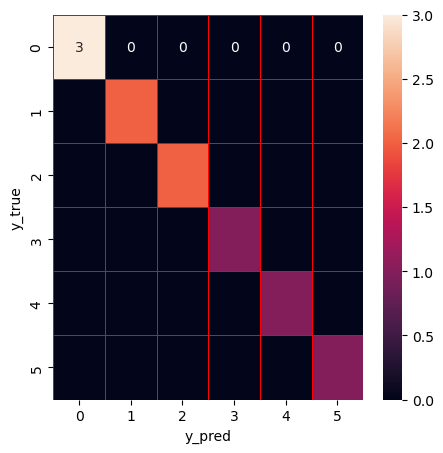

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
import pickle

pickle.dump(clf,open('side.pkl','wb'))
crop = pickle.load(open('side.pkl','rb'))